# **Reducción de Dimensionalidad** 


Queremos reducir el número de características (variables) en un conjunto de datos, manteniendo la mayor cantidad de información relevante posible

# 1.Feature Selection
elección de características

In [1]:
#************************************************1. Cargar los Datos ********************************
import pandas as pd
import numpy as np

# 1. Importar Archivo de datos
df = pd.read_csv('HousingData.csv')

print("\nINFORMACION\n")
df.info()

print("\nDESCRIPCIÓN\n")
df.describe()


INFORMACION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB

DESCRIPCIÓN



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [2]:
#************************************************2. VALORES NULOS ********************************
df = df.fillna(df.mean())  # Rellenar NaN con la media de cada columna

In [3]:
#************************************************2. SEPARAR X e Y ********************************
X = df.drop("MEDV",axis=1) # Selecciona todas menos Y
y = df["MEDV"]


## **1. Mismo espacio vectorial -> Feature reduction**

### **1.1 Método de Filtrado**
<hr>

Esto implica **eliminar** características que no aportan valor al modelo. No se transforma el espacio de las características, sino que simplemente se eliminan las variables menos relevantes o redundantes.


#### **1.1 A) Correlación: Pearson**

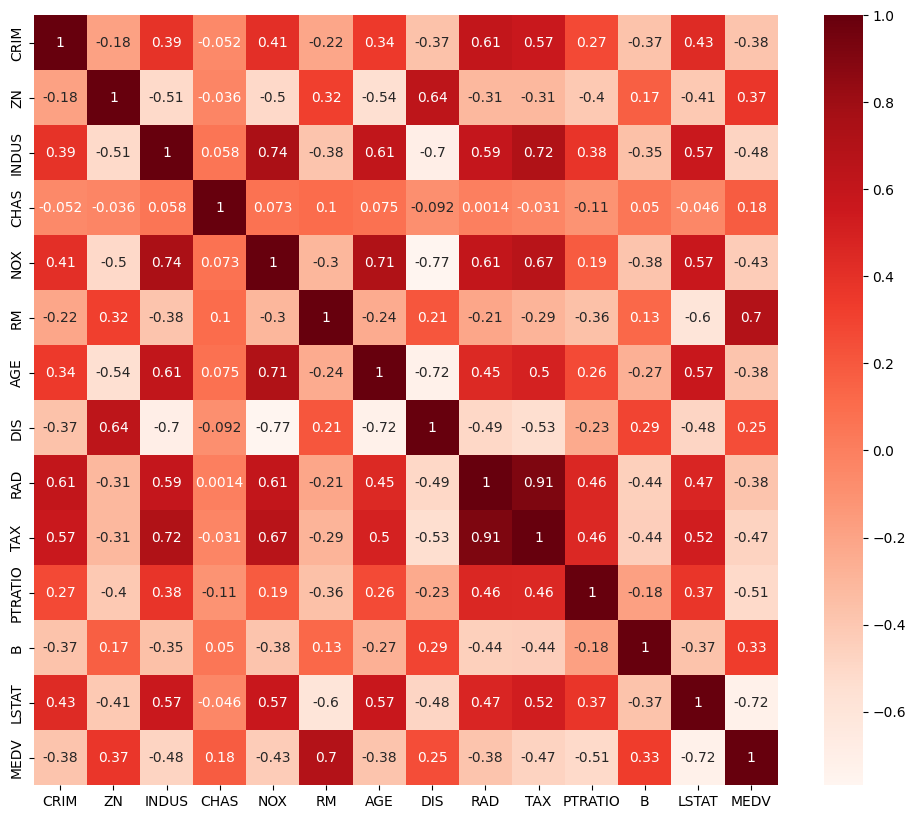

In [4]:
#****************** 1. Cargar datos 
import matplotlib.pyplot as plt
import seaborn as sns

#****************** 2. Cargar HeadMap 
plt.figure(figsize=(12,10))
cor = df.corr() # Por defecto calculamos el de Pearson, para calcular Spearman -> df.corr(method='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**Intensidad del color:**<br>
-Colores oscuros (rojo o blanco intenso): Relaciones **fuertes** (positivas o negativas).<br>
-Colores claros o apagados (naranja o gris claro): Relaciones **débiles.**<br>
**Nos interesan las fuertes**<br><br>
**Magnitud del número:**<br>
-Un número cercano a 1 o -1 indica una relación fuerte. <br>
-Si es negativo es relacion Inversa<br>
-Si es positivo el Lineal<br>
-Un número cercano a 0 indica poca o ninguna relación. 


In [5]:
#****************** 3. Evaluar correlaciones con MEDV

# Correlación con la variable target
cor_target = abs(cor["MEDV"]) #cor ya tiene la tabla df, por ende le damos el nombre de la columna

# ¿Cuáles son las variables que más correlacionadas están?
relevant_features = cor_target[cor_target > 0.5] #Queremos eliminar las más relacionadas
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.721975
MEDV       1.000000
Name: MEDV, dtype: float64

In [6]:
#****************** 4. GUARDAR VARIABLES MÁS CORRELACIONADAS CON MEDV 
X_3 = X[['RM','PTRATIO', 'LSTAT']] #

**¿Porqué seleccionamos las más correlacionadas a MEDV?:** Porque son las que más impactan en el modelo, entonces, debemos eliminar las que son redundantes entre ellas.

In [7]:
#****************** 5. ENCONTRAR LA MAYOR CORRELACION ENTRE ESAS VARIABLES 

print(df[["LSTAT","PTRATIO"]].corr())
print()
print(df[["RM","LSTAT"]].corr())
print()
print(df[["PTRATIO","RM"]].corr())

#Las que tienen más relacion entre ellas es RM Y LSTAT (0.61) ver valor absoluto
#Es decir ambas son "similares", debemos eliminar una

            LSTAT   PTRATIO
LSTAT    1.000000  0.373343
PTRATIO  0.373343  1.000000

             RM     LSTAT
RM     1.000000 -0.602962
LSTAT -0.602962  1.000000

          PTRATIO        RM
PTRATIO  1.000000 -0.355501
RM      -0.355501  1.000000


In [8]:
#****************** 6. ELIMINAR RM O LSTAT: EVALUAR CORRELACION CON MEDV
#Debemos eliminar la que tenga MENOR relacion con MEDV
#Porque debemos quedarnos con las relaciones fuertes: mas cercanas a 1 o -1, las mas cercanas a 0 son menos válidas

print(df[["RM","MEDV"]].corr())
print(df[["LSTAT","MEDV"]].corr())

           RM     MEDV
RM    1.00000  0.69536
MEDV  0.69536  1.00000
          LSTAT      MEDV
LSTAT  1.000000 -0.721975
MEDV  -0.721975  1.000000


In [9]:
#****************** 7. ELIMINAR RM

X_2 = X_3.drop(['RM'], axis = 1)
#RM y LSTAT están bastante correlacionadas. Eliminamos RM que tiene menor correlación con MEDV

In [10]:
#****************** 8. REGRESIÓN LINEAL
# debemos revisar valores nulos, sino da error
# La idea es usar solo las variables más correlacionadas con MEDV (X_2)

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print('R2:', metrics.r2_score(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

R2: 0.5719231246054377
MSE: 31.897333126668926


**con X_2: solo con las variables 'PTRATIO' y 'LSTAT'**<br>
**R2:** 0.5719231246054377: el modelo solo explica el **57.2%** de la variabilidad <br>
**MSE:** 31.897333126668926: El MSE es más alto, lo que indica que las predicciones están más alejadas de los valores reales 


**con X_3:solo con las variables 'PTRATIO' , 'LSTAT' y 'RM'**<br>
**R2:** 0.6497977451935488: explica el **64.98%** de la variabilidad<br>
**MSE:** 26.094654080475618: están, en promedio, a una distancia de aproximadamente 26.09

Conclusión de maca: que tenga un R² más alto y un MSE más bajo indica que RM es una variable importante para la predicción del precio de las viviendas (MEDV). Con X_3 ES MEJOR, sin eliminar RM 


### **1.2 Método Wrapper**
<hr>

Este método consiste en aplicar un algoritmo de Machine Learning e iterar haciendo **todas las combinaciones de variables posibles** para finalmente quedarse con aquella combinación que dé mejor resultado en las métricas.

#### **1.2.1. Backward**

**OBJETIVO:** Obtener **todas las variables** cuyo valor sea **MENOR a 0.05** <br><br>
**PASOS**
1. Se **usan todas las variables para entrenar** el modelo
2. Si existen variables **p_valor > 0.05** , se **eliminan**
3. Se va iterando y borrando
4. Finalmente se obtienen sólo las variables con p-valores < 0.05.

In [11]:
import statsmodels.api as sm

#1.***** ELIMINAR DE DF LA COLUMNA MEDV
X = df.drop("MEDV",axis=1)

#2.***** Guardamos los nombres de todas las columnas (variables) en una lista.
cols = list(X.columns)

#3.*****3. Iterar mientras haya columnas por evaluar
while (len(cols) > 0):
    p = []
    X_new = X[cols] # contiene las columnas actuales.
    X_new = sm.add_constant(X_new) # agrega una columna para el intercepto (término constante en el modelo de regresión).
    model = sm.OLS(y, X_new).fit() # sm.OLS es el modelo de regresión lineal de statsmodels: Creamos un modelo de regresión lineal usando las variables en X_new. 
    p = pd.Series(model.pvalues.values[1:], index = cols) # obtiene los p-valores de las variables (ignora el p-valor del término constante).
    pmax = max(p) ## Buscamos el p-valor más alto entre las variables.
    feature_with_p_max = p.idxmax() # Obtenemos el nombre de la variable con el p-valor más alto.
   
    if (pmax > 0.05):                       # Si el p-valor más alto es mayor a 0.05 (no significativo)...
        cols.remove(feature_with_p_max)     # Se elimina
    else:                                   # Si todos los p-valores son <= 0.05, terminamos el proceso.
        break

selected_features_BE = cols      # Guardamos las variables que quedan después del proceso de eliminación.
print(selected_features_BE)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


#### **1.2.2. Foward**

Comienza con un modelo sin características, y luego agrega una a una las características más útiles, evaluando el rendimiento del modelo con cada nueva adición. Se detiene cuando agregar más características ya no mejora el rendimiento.


#### **1.2.3. Recursive feature elimination (RFE)**

Es una **versión más automatizada de la eliminación hacia atrás (Backwards)**. Este algoritmo entrena el modelo y **elimina** las características **menos importantes de forma recursiva**, evaluando el impacto en el rendimiento en cada paso.

##### **1.2.3.RFE: A) Opción 1: Calcular utilizando un número determinado de características (8)**


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE       #Es la técnica de eliminación recursiva de características (Recursive Feature Elimination)

#1.***** Seleccionar las características predictoras
X = df.drop("MEDV", axis=1)

#2.***** Dividimos los datos en dos subconjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#3.***** Escalar los datos (Normalización/ Estandarización)
scaler = StandardScaler() #Ajusta los datos para que tengan media 0 y desviación estándar 1.
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

#4.***** Crear un modelo de Regression Lineal
model = LinearRegression()

#5.***** Configurar RFE
rfe = RFE(model, n_features_to_select = 8) # Nos quedamos con las 8 mejores características

#6.***** Ajustar RFE al conjunto de datos
rfe.fit(X_train_std, y_train) #Calcula la importancia de cada característica usando el modelo base (LinearRegression).

#7.***** Transformar los datos usando las características seleccionadas
#Reduce X_train_std y X_test_std para incluir solo las 8 características seleccionadas por RFE.
X_train_rfe = rfe.transform(X_train_std)   
X_test_rfe = rfe.transform(X_test_std)

#8.***** Entrenar el modelo con las características seleccionadas
model.fit(X_train_rfe, y_train)

#9.***** Predecir con el modelo entrenado
y_pred = model.predict(X_test_rfe)

#10.***** Evaluar el modelo
print (f'R2:{model.score(X_test_rfe, y_test)}, Es decir explica el {(model.score(X_test_rfe, y_test))*100:.2f}% de la variabilidad')



R2:0.6760402287971456, Es decir explica el 67.60% de la variabilidad


Es un buen punto de partida, pero **no es perfecto.** Queda un 32.4% de la variabilidad sin explicar, posiblemente debido a:<br>
-Características no incluidas.<br>
-Relación no lineal entre las variables.<br>
-Ruido en los datos.<br>


In [13]:
#Ver las Características, seleccionadas   #HOMEMADE
selected_features = X.columns[rfe.support_]
print("Características seleccionadas:", selected_features)


Características seleccionadas: Index(['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='object')


##### **1.2.3.RFE: A) Opción 2: <br>Parte 1: Buscar un numero óptimo de características**


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# 1.***** Inicializar variables *****
high_score = 0  # Variable para guardar el mejor R² encontrado.
nof = 0  # Variable para guardar el número óptimo de características.
score_list = []  # Lista para registrar todos los valores de R² obtenidos.
X = df.drop("MEDV", axis=1)
y = df["MEDV"]


# 2.***** Iterar sobre diferentes números de características *****
for n in range(1, len(X.columns) + 1):  # Desde 1 hasta todas las características disponibles.
    
    # 3.***** Dividir los datos en subconjuntos de entrenamiento y prueba *****
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # 4.***** Crear un modelo de Regresión Lineal *****
    model = LinearRegression()
    
    # 5.***** Configurar RFE con n características seleccionadas *****
    rfe = RFE(model, n_features_to_select=n)
    
    # 6.***** Ajustar RFE al conjunto de datos de entrenamiento *****
    # Calcula la importancia de cada característica usando el modelo base.
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)  # Transforma los datos de prueba usando las características seleccionadas.
    
    # 7.***** Entrenar el modelo con las características seleccionadas *****
    model.fit(X_train_rfe, y_train)
    
    # 8.***** Evaluar el modelo usando el conjunto de prueba *****
    score = model.score(X_test_rfe, y_test)  # Calcula el R² para este conjunto de características.
    score_list.append(score)  # Almacena el R² en la lista.
    
    # 9.***** Comparar con el mejor R² encontrado *****
    if score > high_score:  # Si el R² actual es mejor que el mejor previo:
        high_score = score  # Actualizamos el mejor R².
        nof = n  # Actualizamos el número óptimo de características.

# 10.***** Imprimir el número óptimo de características y su R² *****
print("Optimum number of features: %d" % nof)
print("Score (R2) with %d features: %f" % (nof, high_score))


Optimum number of features: 13
Score (R2) with 13 features: 0.707186


**Aqui hemos obtenido el nuemro de variables "ideales"**<br>
Optimum number of features: **13** #en el ejercicio del profesor me da 9, no 13<br>
Score (R2) with 13 features: 0.707186

In [30]:
score_list

[0.1948071974674822,
 0.5383400514112333,
 0.5401003829058691,
 0.6001409244082494,
 0.6215210076347073,
 0.6937687410366796,
 0.6878886000237217,
 0.6956006644114454,
 0.7012981350127858,
 0.6939417413772164,
 0.700928829189912,
 0.697545513768969,
 0.7071862632031795]

##### **1.2.3.RFE: A) Opción 2: <br>Parte 2: Realizar RFE con la cantidad de Variables determinadas anteriormente**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. ***** Seleccionar las características predictoras
X = df.drop("MEDV", axis=1)  # Eliminamos la columna 'MEDV' del DataFrame para obtener las variables predictoras.

# 2. ***** Obtener los nombres de las columnas de X
cols = list(X.columns)  # Creamos una lista de nombres de las columnas que se utilizarán para la regresión.

# 3. ***** Crear un modelo de regresión lineal
model = LinearRegression()  # Definimos el modelo de regresión lineal que se usará para la selección de características.

# 4. ***** Inicializar el modelo RFE
rfe = RFE(model, n_features_to_select=9)  # A MI ME DIO 13, PERO pondré las del ejercicio del profe Configuramos RFE (Eliminación Recursiva de Características) para seleccionar las 5 mejores características.

# 5. ***** Transformar los datos usando RFE
X_rfe = rfe.fit_transform(X, y)  # Ajustamos RFE al conjunto de datos y aplicamos la transformación para seleccionar las mejores características.

# 6. ***** Obtener las características seleccionadas por RFE
temp = pd.Series(rfe.support_, index=cols)  # Convertimos el resultado de las características seleccionadas en una serie de pandas con los nombres de las columnas.

# 7. ***** Filtrar las características seleccionadas
selected_features_rfe = temp[temp == True].index  # Filtramos las columnas seleccionadas por RFE (aquellas con valor True) y las almacenamos en 'selected_features_rfe'.

# Mostrar las características seleccionadas
print("Características seleccionadas por RFE:", selected_features_rfe)

# 8. ***** Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_rfe], y, test_size=0.3, random_state=42)  # Usar solo las características seleccionadas por RFE.

# 9. ***** Crear y entrenar el modelo con las características seleccionadas
reg = LinearRegression()
reg.fit(X_train, y_train)

# 10. ***** Realizar predicciones y calcular el score (R²)
y_pred = reg.predict(X_test)
score = reg.score(X_test, y_test)
print("Score (R2) with selected features:", score)


Características seleccionadas por RFE: Index(['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')
Score (R2) with selected features: 0.7012981350127858


### **1.3 Métodos Embebidos**
<hr>

Estos métodos incorporan la **selección de características directamente dentro del proceso** de entrenamiento del modelo. Lasso y Ridge son tipos de regresión que añaden una **penalización (regularización) para reducir el peso** de las características menos importantes.


#### **1.3.1.Lasso (Least Absolute Shrinkage and Selection Operator):**

Las variables elegidas por lasso tendrán valor != a 0 y las no elegidas tendrán valor 0

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import matplotlib.pyplot as plt

X = df.drop("MEDV", axis=1)

#1.***** Definir modelo y características
reg = LassoCV()
reg.fit(X, y)

#2.***** Calcular coeficientes
coef = pd.Series(reg.coef_, index = X.columns)

#3.Variables seleccionadas (coeficientes no cero)
selected_features = coef[coef != 0]
print(f"Las variables seleccionadas son {len(selected_features)} :\n {selected_features}\n")

#4.Variables NO seleccionadas (coeficientes cero)
eliminated_features = coef[coef == 0]
print(f"Las variables NO seleccionadas son {len(eliminated_features)} :\n {eliminated_features}")


Las variables seleccionadas son 10 :
 CRIM      -0.081854
ZN         0.045620
INDUS     -0.034482
RM         2.230513
DIS       -0.830296
RAD        0.245503
TAX       -0.014560
PTRATIO   -0.717914
B          0.008935
LSTAT     -0.628709
dtype: float64

Las variables NO seleccionadas son 3 :
 CHAS    0.0
NOX    -0.0
AGE    -0.0
dtype: float64


Text(0.5, 1.0, 'Importancia de las variables usando el Modelo de Lasso')

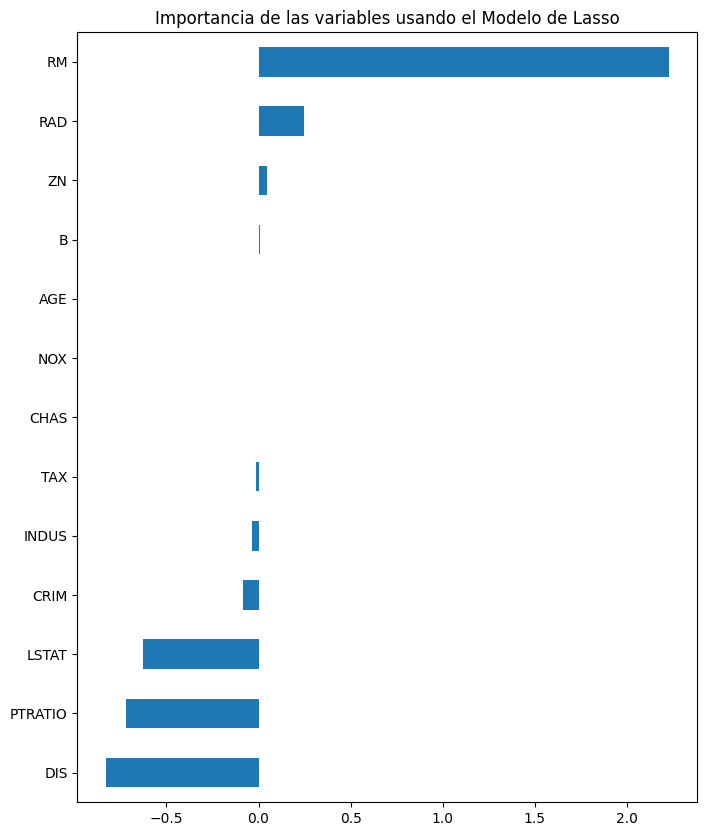

In [ ]:
#5.Graficar por magnitud e importancia
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Importancia de las variables usando el Modelo de Lasso")

#### **1.3.2.Ridge:**


Similar a Lasso, pero **en lugar** de hacer que algunos coeficientes sean cero, **reduce todos los coeficientes**, lo que implica que **no elimina** ninguna característica pero las hace menos influyentes.

In [61]:
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt
import pandas as pd

# 1.***** Definir modelo y características
reg = RidgeCV()
reg.fit(X, y)  # Ajustamos el modelo con las variables predictoras (X) y el target (y)

# 2.***** Calcular coeficientes
coef = pd.Series(reg.coef_, index = X.columns)

# 3.***** Variables seleccionadas (coeficientes no cero)
# Filtramos las variables cuyo coeficiente es diferente de cero (seleccionadas por Ridge)
selected_features = coef[coef != 0]
print(f"Las variables seleccionadas son {len(selected_features)} :\n {selected_features}\n")

# 4.***** Variables NO seleccionadas (coeficientes cero)
# Filtramos las variables cuyo coeficiente es cero (no seleccionadas por Ridge)
eliminated_features = coef[coef == 0]
print(f"Las variables NO seleccionadas son {len(eliminated_features)} :\n {eliminated_features}\n")


Las variables seleccionadas son 13 :
 CRIM       -0.110048
ZN          0.040652
INDUS      -0.042630
CHAS        3.033646
NOX       -15.769873
RM          4.116923
AGE        -0.011464
DIS        -1.474542
RAD         0.266792
TAX        -0.010691
PTRATIO    -0.917463
B           0.009397
LSTAT      -0.466320
dtype: float64

Las variables NO seleccionadas son 0 :
 Series([], dtype: float64)



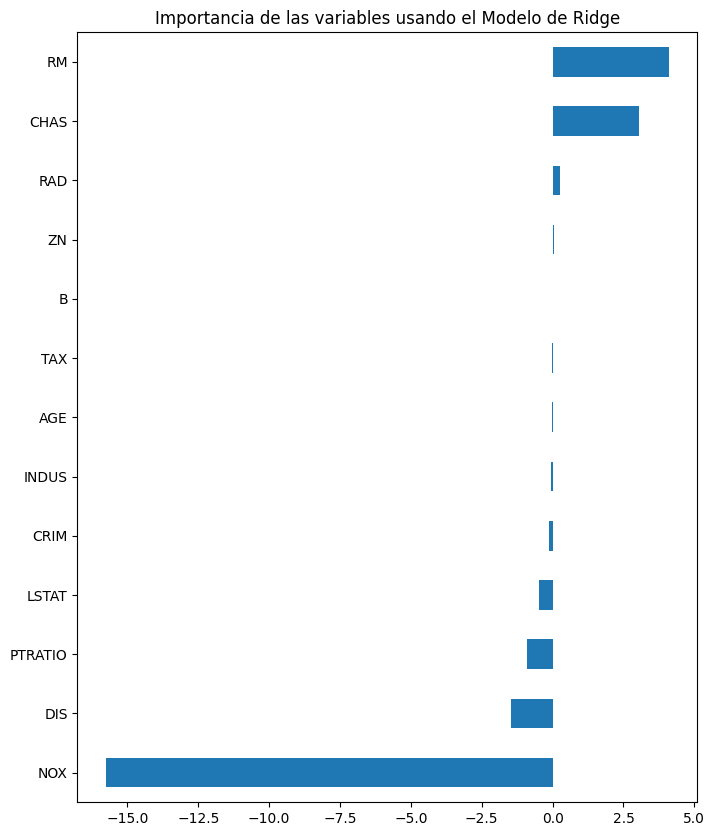

In [60]:
# 5.***** Graficar por magnitud e importancia
# Ordenamos los coeficientes por su magnitud (de menor a mayor)
imp_coef = coef.sort_values()
# Definimos el tamaño de la figura
plt.rcParams['figure.figsize'] = (8.0, 10.0)
# Graficamos los coeficientes ordenados en un gráfico de barras horizontales
imp_coef.plot(kind = "barh")
# Titulo del gráfico
plt.title("Importancia de las variables usando el Modelo de Ridge")
# Mostrar el gráfico
plt.show()

## **2.Nuevo espacio vectorial -> Feature extraction**

Nuevo espacio vectorial significa que **se modifican los datos del dataset.**<br>
Aquí, en lugar de eliminar características, **se combinan o transforman las variables originales en nuevas dimensiones** (características), de forma que se mantenga la mayor cantidad de información relevante en un espacio de menor dimensión.

### **2.0 Punto Cero: Prepararemos un nuevo dataframe para posterior análisis**
<hr>

##### **0.1 Cargar del conjunto de datos y preparación inicial**

In [63]:
import numpy as np
import pandas as pd
from sklearn import utils
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

In [64]:
X.shape # 178 muestras y 13 columnas

(178, 13)

In [65]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
# Creamos un dataframe agregando X e y
df_wine = X.join(pd.Series(y, name='class'))

#Combina el DataFrame X con una nueva columna llamada class que contiene las categorías legibles 
# para cada muestra. Esto crea un DataFrame completo con las características y la clase.

In [ ]:
df_wine.head()

##### **0.2 Codificacion de la Clase: Preparacion de datos**

In [ ]:
#Transformar a datos numéricos

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(df_wine['class'])
df_wine['class'] = encoded.astype('int')

In [ ]:
#Verificar nuestra clase
df_wine['class'].unique()

In [ ]:
df_wine.sample(10)

##### **0.3 División de datos en conjuntos de entrenamiento y prueba**

In [ ]:
X = df_wine.iloc[:, :-1]
y = df_wine.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state = 42
)

"""Divide los datos en dos conjuntos:
X_train y y_train: datos de entrenamiento (70% de las muestras).
X_test y y_test: datos de prueba (30% de las muestras)."""

##### **0.4 Estandarización de los datos**

Si las características tienen rangos muy diferentes, las que tienen valores más grandes pueden dominar el modelo. La estandarización asegura que todas las características estén en la misma escala.

In [ ]:
#Procesado de los datos -> en este caso simplemente estandarizamos
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Ojo: La estandarización se realiza mirando sólo los datos de train.
# Hacemos fit + transform
# Los datos de test también los normalizamos pero sólo con transform.
# Esto es para evitar que información de los datos de test pasen al modelo
# a través del ajuste de la estandarización

In [ ]:
X_train_std

### **2.1 PCA (Principal Component Analysis) -> Análisis de los componentes principales**
<hr>